In [1]:
import pandas as pd
import numpy as np

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
na_sentinels = {'SALEDATE':['1900-01-01T00:00:00.000Z'],'PRICE':[0,''],'AYB':[0],'EYB':[0]}

In [3]:
#three data sources
residential = pd.read_csv("raw_residential_data.csv", index_col='SSL', na_values=na_sentinels).drop(columns=["OBJECTID"])
condo = pd.read_csv("raw_condominium_data.csv", index_col='SSL', na_values=na_sentinels).drop(columns=["OBJECTID"])
address = pd.read_csv("raw_address_points.csv")

/Users/jizumi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
residential["SOURCE"] = "Residential"
condo["SOURCE"] = "Condominium"

df = pd.concat([residential,condo], sort=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160765 entries, 0152    0133 to 0504    2290
Data columns (total 40 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   BATHRM             160078 non-null  float64
 1   HF_BATHRM          159838 non-null  float64
 2   HEAT               160077 non-null  float64
 3   HEAT_D             160077 non-null  object 
 4   AC                 160078 non-null  object 
 5   NUM_UNITS          107127 non-null  float64
 6   ROOMS              160047 non-null  float64
 7   BEDRM              160074 non-null  float64
 8   AYB                160481 non-null  float64
 9   YR_RMDL            81571 non-null   float64
 10  EYB                160082 non-null  float64
 11  STORIES            107080 non-null  float64
 12  SALEDATE           133588 non-null  object 
 13  PRICE              99424 non-null   float64
 14  QUALIFIED          160764 non-null  object 
 15  SALE_NUM           160765 non-null  int

In [6]:
#Identify all categorical variables
categories = [['CNDTN_D','CNDTN'],['HEAT_D','HEAT'],['STYLE_D','STYLE'],['STRUCT_D','STRUCT'],['GRADE_D','GRADE'],['ROOF_D','ROOF'],['EXTWALL_D','EXTWALL'],['INTWALL_D','INTWALL']]
cat_drop = []
for c in categories:
    df[c[1]] = df[c[0]].astype('category')
    cat_drop.append(c[0])

df['SOURCE'] = df['SOURCE'].astype('category')    
#eliminate redundant dummy variables
df.drop(cat_drop, inplace=True, axis=1)

In [7]:
print(df.isnull().sum())

BATHRM                  687
HF_BATHRM               927
HEAT                    688
AC                      687
NUM_UNITS             53638
ROOMS                   718
BEDRM                   691
AYB                     284
YR_RMDL               79194
EYB                     683
STORIES               53685
SALEDATE              27177
PRICE                 61341
QUALIFIED                 1
SALE_NUM                  0
GBA                   53611
BLDG_NUM                  0
STYLE                 53638
STRUCT                53638
GRADE                 53638
CNDTN                 53638
EXTWALL               53638
ROOF                  53638
INTWALL               53638
KITCHENS              53639
FIREPLACES              849
USECODE                   0
LANDAREA                  0
GIS_LAST_MOD_DTTM         0
SOURCE                    0
CMPLX_NUM            107154
LIVING_GBA           107154
dtype: int64


In [8]:
df.dropna(subset=['ROOMS','BEDRM','BATHRM','HF_BATHRM','FIREPLACES','EYB','QUALIFIED'], inplace=True)

print(df.isnull().sum())

BATHRM                    0
HF_BATHRM                 0
HEAT                      0
AC                        0
NUM_UNITS             52540
ROOMS                     0
BEDRM                     0
AYB                     279
YR_RMDL               78345
EYB                       0
STORIES               52584
SALEDATE              26907
PRICE                 60996
QUALIFIED                 0
SALE_NUM                  0
GBA                   52540
BLDG_NUM                  0
STYLE                 52540
STRUCT                52540
GRADE                 52540
CNDTN                 52540
EXTWALL               52540
ROOF                  52540
INTWALL               52540
KITCHENS              52541
FIREPLACES                0
USECODE                   0
LANDAREA                  0
GIS_LAST_MOD_DTTM         0
SOURCE                    0
CMPLX_NUM            107104
LIVING_GBA           107104
dtype: int64


In [9]:
int_col = ['BATHRM','HF_BATHRM','ROOMS','BEDRM','EYB','SALE_NUM','BLDG_NUM','FIREPLACES','LANDAREA']
#con_col = ['BATHRM','HF_BATHRM','NUM_UNITS','ROOMS','BEDRM','EYB','STORIES','SALE_NUM','KITCHENS','FIREPLACES','LANDAREA']

for i in int_col:
    df[i] = df[i].astype('int64')

In [10]:
print(df["SALEDATE"].sort_values(ascending=True).head(5))
print(df["SALEDATE"].sort_values(ascending=False).head(5))

SSL
1601    2116    1201-09-11T00:00:00.000Z
5235    0005    1947-05-14T00:00:00.000Z
1002    0078    1949-11-17T00:00:00.000Z
1031    0172    1950-08-22T00:00:00.000Z
2071    0009    1955-08-17T00:00:00.000Z
Name: SALEDATE, dtype: object
SSL
0037    2015    2018-07-12T00:00:00.000Z
5381    0036    2018-07-12T00:00:00.000Z
2839    2023    2018-07-12T00:00:00.000Z
3125    0140    2018-07-12T00:00:00.000Z
1529    0804    2018-07-12T00:00:00.000Z
Name: SALEDATE, dtype: object


In [11]:
import re

def valid_datestring(x):
    if re.match(r'(19|20)\d{2}\-',str(x)):
        return x
    else:
        return None

df["SALEDATE"] = df['SALEDATE'].map(valid_datestring)
df['GIS_LAST_MOD_DTTM'] =  df['GIS_LAST_MOD_DTTM'].map(valid_datestring)

In [12]:
df['SALEDATE'] = pd.to_datetime(df['SALEDATE'], dayfirst=False)
df['GIS_LAST_MOD_DTTM'] = pd.to_datetime(df['GIS_LAST_MOD_DTTM'], dayfirst=False)

In [14]:
df = df[( (df["ROOMS"]<100) & (df["ROOMS"]>=df["BEDRM"]) & (df["BATHRM"]<24) )]


In [15]:
address.head(5)

,X,Y,OBJECTID_12,SITE_ADDRESS_PK,ADDRESS_ID,STATUS,SSL,TYPE_,ENTRANCETYPE,ADDRNUM,...,LONGITUDE,ACTIVE_RES_UNIT_COUNT,RES_TYPE,ACTIVE_RES_OCCUPANCY_COUNT,WARD_2002,WARD_2012,ANC_2002,ANC_2012,SMD_2002,SMD_2012
0,-77.000353,38.892195,832017,27746,27746,ACTIVE,0814 0018,ADDRESS,OFFICIAL,402.0,...,-77.000351,0.0,RESIDENTIAL,1.0,Ward 6,Ward 6,ANC 6C,ANC 6C,SMD 6C07,SMD 6C03
1,-76.999249,38.892652,832018,50808,50808,ACTIVE,0838 0027,ADDRESS,OFFICIAL,219.0,...,-76.999247,0.0,RESIDENTIAL,1.0,Ward 6,Ward 6,ANC 6C,ANC 6C,SMD 6C07,SMD 6C03
2,-76.999735,38.892564,832019,51065,51065,ACTIVE,0814 0818,ADDRESS,OFFICIAL,216.0,...,-76.999733,1.0,RESIDENTIAL,2.0,Ward 6,Ward 6,ANC 6C,ANC 6C,SMD 6C07,SMD 6C03
3,-76.999231,38.892546,832020,51219,51219,ACTIVE,0838 0041,ADDRESS,OFFICIAL,215.0,...,-76.999229,0.0,RESIDENTIAL,1.0,Ward 6,Ward 6,ANC 6C,ANC 6C,SMD 6C07,SMD 6C03
4,-76.997461,38.892194,832021,3171,3171,ACTIVE,0866 0013,ADDRESS,OFFICIAL,626.0,...,-76.997459,1.0,RESIDENTIAL,2.0,Ward 6,Ward 6,ANC 6C,ANC 6C,SMD 6C07,SMD 6C03


In [16]:
address_subset = address.drop_duplicates(['SSL'], keep='last').set_index("SSL")[["FULLADDRESS","CITY","STATE","ZIPCODE","NATIONALGRID","LATITUDE","LONGITUDE","ASSESSMENT_NBHD","ASSESSMENT_SUBNBHD","CENSUS_TRACT","CENSUS_BLOCK","WARD"]]

In [17]:
premaster = pd.merge(df,address_subset,how="left",on="SSL")

In [18]:
address["SQUARE"] = address["SQUARE"].apply(lambda x: str(x)[0:4])

address_impute = address[((address["SQUARE"]!="0000") & (address["SQUARE"].str.match(r'\d+')) )] \
    .groupby("SQUARE") \
    .agg({'X':'median','Y':'median','QUADRANT':'first','ASSESSMENT_NBHD':'first','ASSESSMENT_SUBNBHD':'first','CENSUS_TRACT': 'median','WARD':'first','ZIPCODE':'median','LATITUDE':'median','LONGITUDE':'median'})  

print(address_impute.head())

                X          Y QUADRANT ASSESSMENT_NBHD ASSESSMENT_SUBNBHD  \
SQUARE                                                                     
0001   -77.056557  38.901003       NW    Foggy Bottom                NaN   
0002   -77.056658  38.900396       NW    Foggy Bottom                NaN   
0004   -77.055865  38.903403       NW    Foggy Bottom                NaN   
0005   -77.055890  38.900857       NW    Foggy Bottom                NaN   
0006   -77.055352  38.900291       NW    Foggy Bottom                NaN   

        CENSUS_TRACT    WARD  ZIPCODE   LATITUDE  LONGITUDE  
SQUARE                                                       
0001          5600.0  Ward 2  20037.0  38.900995 -77.056554  
0002          5600.0  Ward 2  20037.0  38.900389 -77.056656  
0004          5600.0  Ward 2  20037.0  38.903396 -77.055862  
0005          5600.0  Ward 2  20037.0  38.900849 -77.055888  
0006          5600.0  Ward 2  20037.0  38.900284 -77.055350  


In [19]:
#create a SQUARE key on premaster
premaster["SQUARE"] = df.apply(axis=1, func=lambda x: str(x.name)[0:4]) 
master = pd.merge(premaster,address_impute,how="left",on="SQUARE", suffixes=('', '_impute')) \

cols_to_impute = ["CENSUS_TRACT","LATITUDE","LONGITUDE","ZIPCODE","WARD","ASSESSMENT_NBHD","ASSESSMENT_SUBNBHD"]
for c in cols_to_impute:
    master[c] = master[c].fillna(master[(c + "_impute")])

master.drop(["CENSUS_TRACT_impute","LATITUDE_impute","LONGITUDE_impute","ZIPCODE_impute","WARD_impute","ASSESSMENT_NBHD_impute","ASSESSMENT_SUBNBHD_impute"],axis=1,inplace=True)

In [20]:
master.describe()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,9.821600e+04,...,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,9.313516e+05,...,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,7.061325e+06,...,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,1.000000e+00,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,2.400000e+05,...,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,3.999990e+05,...,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,6.520000e+05,...,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,1.374275e+08,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


In [21]:
master.to_csv("DC_Properties.csv", header=True)

In [30]:
filepath = "DC_Properties.csv"

dc_properties_df = pd.read_csv(filepath)
dc_properties_df.head()

/Users/jizumi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [31]:
dc_properties_df.count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

In [32]:
dc_properties_df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,...,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,79478.000000,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,...,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,45887.077707,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,...,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,39739.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,...,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,79478.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,...,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,119217.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,...,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f971e300e80>,
      dtype=object)

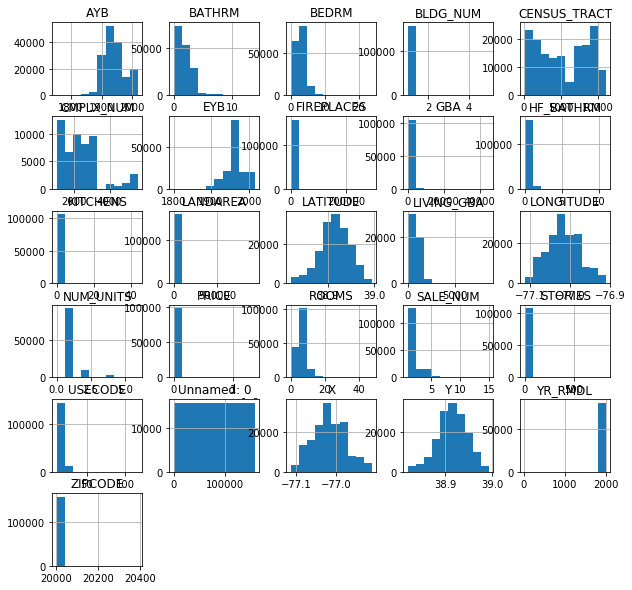

In [33]:
#plot the frequency count for each column
dc_properties_df.hist(figsize=(10,10))

In [34]:
dc_properties_df.isnull().sum()

Unnamed: 0                 0
BATHRM                     0
HF_BATHRM                  0
HEAT                       0
AC                         0
NUM_UNITS              52261
ROOMS                      0
BEDRM                      0
AYB                      271
YR_RMDL                78029
EYB                        0
STORIES                52305
SALEDATE               26770
PRICE                  60741
QUALIFIED                  0
SALE_NUM                   0
GBA                    52261
BLDG_NUM                   0
STYLE                  52261
STRUCT                 52261
GRADE                  52261
CNDTN                  52261
EXTWALL                52261
ROOF                   52261
INTWALL                52261
KITCHENS               52262
FIREPLACES                 0
USECODE                    0
LANDAREA                   0
GIS_LAST_MOD_DTTM          0
SOURCE                     0
CMPLX_NUM             106696
LIVING_GBA            106696
FULLADDRESS            52917
CITY          

In [35]:
dc_properties_df['PRICE'].isnull().sum()

60741

In [51]:
dc_properties_df.dropna(axis='columns', how='all')

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158952,158952,1,0,Forced Air,Y,NaN,3,1,1938.0,2006.0,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158953,158953,1,0,Forced Air,Y,NaN,4,2,1938.0,2006.0,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158954,158954,2,0,Forced Air,Y,NaN,4,2,1920.0,2007.0,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158955,158955,1,0,Warm Cool,Y,NaN,2,0,1965.0,NaN,...,-77.018230,Southwest Waterfront,NaN,11000.0,NaN,Ward 6,504,-77.018232,38.872961,SW


In [52]:
dc_properties_df['PRICE'].isnull().sum()

60741

In [57]:
dc_properties_df['PRICE'].fillna(0)

0         1095000.0
1               0.0
2         2100000.0
3         1602000.0
4               0.0
            ...    
158952     399900.0
158953     416000.0
158954     600000.0
158955     215100.0
158956          0.0
Name: PRICE, Length: 158957, dtype: float64

In [58]:
dc_properties_df['PRICE'].head()

0    1095000.0
1          NaN
2    2100000.0
3    1602000.0
4          NaN
Name: PRICE, dtype: float64

In [59]:
dc_properties_df['PRICE'].dropna(how='all')

0         1095000.0
2         2100000.0
3         1602000.0
5         1950000.0
7         1050000.0
            ...    
158951     389000.0
158952     399900.0
158953     416000.0
158954     600000.0
158955     215100.0
Name: PRICE, Length: 98216, dtype: float64

In [60]:
dc_properties_df['PRICE'].head()

0    1095000.0
1          NaN
2    2100000.0
3    1602000.0
4          NaN
Name: PRICE, dtype: float64

In [61]:
#Method 1: manual calculation of z-scores for 'Glucose' column

#mean for the column
avg = dc_properties_df['PRICE'].mean()

#standard deviation of the column
stdev = dc_properties_df['PRICE'].std()

#each value in column minus the mean and then divide by the standard deviation
z_manual = (dc_properties_df['PRICE'] - avg)/stdev

In [62]:
avg, stdev

(931351.5949336156, 7061324.955612032)

In [63]:
z_manual.head

<bound method NDFrame.head of 0         0.023175
1              NaN
2         0.165500
3         0.094975
4              NaN
            ...   
158952   -0.075262
158953   -0.072982
158954   -0.046925
158955   -0.101433
158956         NaN
Name: PRICE, Length: 158957, dtype: float64>

In [64]:
z_manual.dropna()

0         0.023175
2         0.165500
3         0.094975
5         0.144257
7         0.016803
            ...   
158951   -0.076806
158952   -0.075262
158953   -0.072982
158954   -0.046925
158955   -0.101433
Name: PRICE, Length: 98216, dtype: float64

In [65]:
#MinMaxScaler function will calculate the formula
minmax_sc = MinMaxScaler()

In [72]:
dc_properties_df['PRICE'].fillna(dc_properties_df['PRICE'].mean())

0         1.095000e+06
1         9.313516e+05
2         2.100000e+06
3         1.602000e+06
4         9.313516e+05
              ...     
158952    3.999000e+05
158953    4.160000e+05
158954    6.000000e+05
158955    2.151000e+05
158956    9.313516e+05
Name: PRICE, Length: 158957, dtype: float64

In [81]:
dc_properties_df.astype?

In [78]:
dc_properties_df['PRICE'].head

<bound method NDFrame.head of 0         1095000.0
1               NaN
2         2100000.0
3         1602000.0
4               NaN
            ...    
158952     399900.0
158953     416000.0
158954     600000.0
158955     215100.0
158956          NaN
Name: PRICE, Length: 158957, dtype: float64>

In [82]:
dc_properties_df.reset_index()

,index,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158952,158952,158952,1,0,Forced Air,Y,NaN,3,1,1938.0,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158953,158953,158953,1,0,Forced Air,Y,NaN,4,2,1938.0,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158954,158954,158954,2,0,Forced Air,Y,NaN,4,2,1920.0,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158955,158955,158955,1,0,Warm Cool,Y,NaN,2,0,1965.0,...,-77.018230,Southwest Waterfront,NaN,11000.0,NaN,Ward 6,504,-77.018232,38.872961,SW


In [83]:
dc_properties_df['PRICE'].fillna(dc_properties_df['PRICE'].mean())

0         1.095000e+06
1         9.313516e+05
2         2.100000e+06
3         1.602000e+06
4         9.313516e+05
              ...     
158952    3.999000e+05
158953    4.160000e+05
158954    6.000000e+05
158955    2.151000e+05
158956    9.313516e+05
Name: PRICE, Length: 158957, dtype: float64

In [84]:
dc_properties_df['PRICE'].max

<bound method Series.max of 0         1095000.0
1               NaN
2         2100000.0
3         1602000.0
4               NaN
            ...    
158952     399900.0
158953     416000.0
158954     600000.0
158955     215100.0
158956          NaN
Name: PRICE, Length: 158957, dtype: float64>

In [89]:
dc_properties_df['PRICE'].fillna(avg, inplace=True)

In [90]:
dc_properties_df['PRICE'].astype(int)

0         1095000
1          931351
2         2100000
3         1602000
4          931351
           ...   
158952     399900
158953     416000
158954     600000
158955     215100
158956     931351
Name: PRICE, Length: 158957, dtype: int64

In [91]:
#use MinMaxScaler function and fit_transform function on the 'PRICE' column
prop_minmax = minmax_sc.fit_transform(dc_properties_df[['PRICE']])

In [92]:
#mean and standard deviation of Min-Max 'Price' column
prop_minmax.mean(), prop_minmax.std()

(0.0067770300467104, 0.04038885061696727)

In [93]:
#convert array into a dataframe column
#look at first 5 rows of min-max values
prop_mm_col = pd.Series(prop_minmax.reshape(-1))
prop_mm_col.head()

0    0.007968
1    0.006777
2    0.015281
3    0.011657
4    0.006777
dtype: float64

In [94]:
#verify the range is between 0 and 1
prop_mm_col.min(), prop_mm_col.max()

(0.0, 0.9999999999999999)